In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
cv2.__version__



'3.4.1'

In [2]:
from annotate import *
def imshow(img):  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

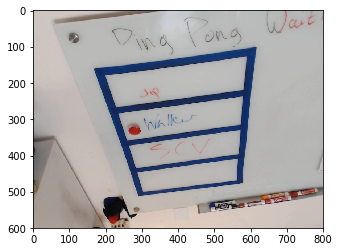

In [3]:
image = cv2.imread("../reference/frame17978.png")
imshow(image)

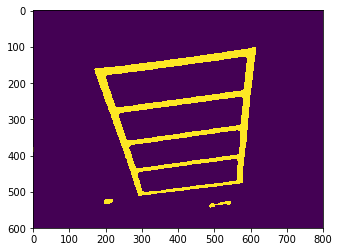

In [4]:
# step 1, extract the right kind of blue
mask, bluewhite = tightbluemask(image)

plt.imshow(mask)

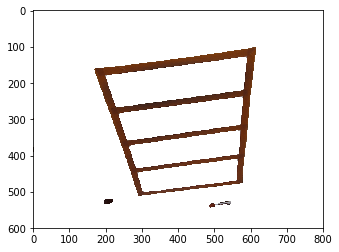

In [5]:
# step 1, extract the right kind of blue (continued)

plt.imshow(bluewhite.image)

Found 5 outer contours


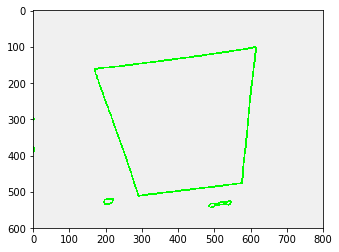

In [7]:
# step 2: extract raw contours
dst, cnts = extract_raw_contours(image, mask)

plt.imshow(dst)

In [13]:
[len(x) for x in cnts]


[58, 36, 12, 6, 521]

Found shape with sides: 15
Found shape with sides: 17
Found shape with sides: 10
Found shape with sides: 6
Found shape with sides: 4
-- Found: 445 x 409


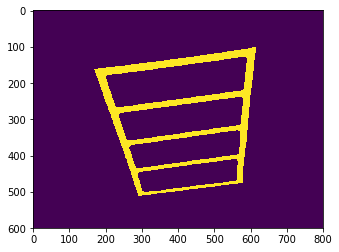

In [14]:
# step 3: get outer rectangle

# step 4: remove area outside of outer rectangle from mask (ie set to 0)
(bluewhite.contour, mask) = find_outer_rect(cnts, image, mask)

plt.imshow(mask)

In [15]:
# step 5: find inner rectangles
contours, hier = find_inner_rectangles(mask)
assert len(contours) == 4, "Expected four inner rectangles, found %d " % len(contours)

print("HIER\n", hier)

HIER
 [[[ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [-1  3 -1  0]]]


Found shape with sides: 4
Found shape with sides: 4
Found shape with sides: 4
Found shape with sides: 4


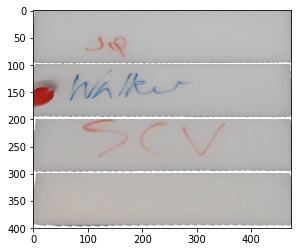

In [16]:
# step 6: get contents of inner rectangles (boxes)
boxes = get_inner_rect_contents(contours, image)

imshow(np.concatenate([b.image for b in boxes]))

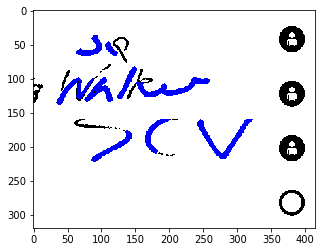

In [17]:
# step 7: classify
classify_boxes(boxes)

imshow(np.concatenate([b.contentdetection  for b in boxes]))

In [18]:
# step 8: timestamps
addTimeIndicators(boxes, None)

print("Indicators: " , ([(i, b.indicator) for (i, b) in enumerate(boxes)]))

Indicators:  [(0, 'just now'), (1, 'just now'), (2, 'just now'), (3, '')]


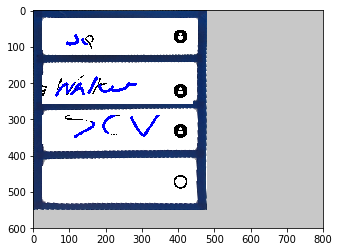

In [19]:
# step 9: reconstruct image
bluestraight = reconstruct(boxes, bluewhite)
imshow(bluestraight)